## Frame the Problem and Look at the Big Picture
> <p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Problem Framing & Big Picture</p>

>In most school system like Portuguese, ensuring that learners perform excellently well is a key priority. Proactively identifying learners who are at the risk of underperforming allows education managements to provide timely supports and interventions. By leveraging on student data, a machine learning model is be developed to predict student peformances, which will profer opportunities for advising team to proactively attend to learners' needs. Thus, improve their academic performances. 

>The objective of this project is to develop a machine learning model that can accurately predicts a learner's performance in a class based on various factors or variables. This model will assist the advising team to proactively identify learners who are in one way or the other need additional supports to improve on their grades. 

>This task is a supervised learning, since the student dataset contains a label (with each instance has an output, final grade (G3)). Supervised learning is a case of machine learning where the desired solutions otherwise known as labels are provided as part of the training set (input). Whereas, in unserpvised learning the training data is unlabeled. Also, the task is better as a batch learning rather than online since we are not expecting continous flow of data into the system.  Moreso, this task is regression task (although can be done as clasification task) since we are interested in predicting student's performance.This task is considered a multiple regression problem (since multiple factors/variables/features - school, sex, age, address etc. will be employed in the prediction of final grade) as well as univariant regression problem (since we are only interested in predicting only on single variable - final grade for each learners). A regression task involves predicting numeric target values (in our case final grade for students) while a classification task involve predicting the correct label of a given input data like which grade a student has in a class/subject.

>The models' performances will be evaluated using the root mean square error (RMSE), which provides how much errors the model makes in their predictions.

>Moreover, this task will focus on two schools within the district and only one subject/class- mathematics is chosen. The student info data will be splitted in such away that there a fair gender (male and female) representation in the training and testing datasets. And the task employs various machine learning models - linear regression, decison trees, random forest, and support vector machines. The performance of the different machine learning models are evaluated and compared, the best performing model is chosen/recommended as final model for deployment into production.

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Standard Imports</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

## Get the data
The student info data as downloaded from the Brightspace is imported and named as df_students

***
<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Import data</p>

In [2]:
# import student info data
df_students = pd.read_csv("student-mat.csv")

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Dataset structure overview</p>

In [3]:
# view the top 3 rows of the dataset to have an overview of the column names
df_students.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10


 <p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Checking the size and type of data</p>

In [4]:
# overview of the data description - number of rows, data attribute types and non-null values
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Observations</p>

- The dataset has a total of 395 instances/observations and 35 columns or attributes - school, sex, age, address etc.
- Each row represent individual student information.
- Out of the 35 attributes, there are 4 float data types, 14 integer data types and 17 object data types - 18 numeric data types and 17 categoric data types
- It is observed that age, absences_G1,  absences_G, and   absences_ contain missing values. Thus, cleaning is required.

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >The following features/variables are available in the dataset</p>

1. school - student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex ("F" - female or "M" - male)
3. age - student's age (numeric from 15 to 22)
4. address - student's home address type ("U" - urban or "R" - rural)
5. famsize - family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status ("T" - living together or "A" - apart)
7. Medu - mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (0 - none, 1 - primary education (4th grade), 2 – 5t  to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job ( "teacher", "health" care related, civil "services" (e.g. admi istrative or police), "at_home" or "other")
10. Fjob - father's job ("teacher", "health" care related, civil "services" (e.g. admin strative or police), "at_home" or "other")
11. reason - reason to choose this school (close to "home", school "reputat on", "course" preference or "other")
12. guardian - student's guardian ("mother", "father" or "other")
13. traveltime - home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 1  hours, or 4 - >10 hours)
15. failures - number of past class failures (n if 1<=n<3, else 4)
16. schoolsup - extra educational support (yes or no)
17. famsup - family educational support (yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (yes or no)
19. activities - extra-curricular activities (yes or no)
20. nursery - attended nursery school (yes or no)
21. higher - wants to take higher education (yes or no)
22. internet - Interne
23. romantic - with a romantic relationship (yes or no)
24. famrel - quality of family relationships (from 1 - very bad to 5 - excellent)
25. freetime - free time after school (from 1 - very low to 5 - very high)
26. goout - going out with friends (from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (from 1 - very low to 5 - very high)
29. health - current health status (from 1 - very bad to 5 - very good)
30. absences_G1 - number of school absences for G1 term (numeric)
31. absences_G2 - number of school absences for G2 term (numeric)
32. absences_G3 - number of school absences for G3 term 
33. G1 - first term grade (numeric: from 0 to 20)
34. G2 - second term grade (numeric: from 0 to 20)
35. G3 - final grade (numeric: from 0 to 20)


**Note:** **A close observation of the data shows that there are some data that are numeric category column data, which needs to be separate from the continuous numeric data**

In [5]:
# Change/convert the numeric categoric features into string/object categoric features
df_students = df_students.astype({'Medu':'object', 'Fedu':'object', 'traveltime':'object', 'studytime':'object', 'famrel':'object', 'freetime':'object', 
                    'goout':'object', 'Dalc':'object', 'Walc':'object', 'health':'object'})

In [6]:
# overview of the data description after converting some numeric categoric features into string categoric features
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    object 
 7   Fedu         395 non-null    object 
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    object 
 13  studytime    395 non-null    object 
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

***
<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Identify the target or label attribute</p>

- The target feature for this machine learning task is **final grade, G3**, and the remaining 34 features and one other that is created through feature engineering is used as predicting variables. By implication the model is predicting students' **final graded, G3**.

***
<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Split data into train and test sets</p>

In [7]:
# Spliting dataset into training and test sets using stratified sampling
# stratified sampling is employed to enusre fair representative of the sex types in the student info data - male and female
train_set, test_set = train_test_split(df_students, test_size = 0.2, stratify = df_students["sex"], random_state = 20)

## Data Exploration

The test data set is set aside and the training data set is explored to learn more about the data in terms of potential relationship between the precdicting features/variables and target variable via data visualizations

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Training set attributes 
and their characteristics</p>

In [8]:
# Overview of the training set that are numeric attributes
train_set.describe()

,age,failures,absences_G1,absences_G2,absences_G3,G1,G2,G3
count,306.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000,316.000000
mean,16.653595,0.297468,0.636066,0.636066,4.131148,10.914557,10.743671,10.405063
std,1.200111,0.680891,1.331060,1.331060,5.603322,3.261460,3.791485,4.627095
min,15.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,0.000000,0.000000,0.000000,3.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,1.000000,1.000000,5.000000,13.000000,13.000000,14.000000
max,21.000000,3.000000,12.000000,12.000000,51.000000,19.000000,19.000000,20.000000


<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Observations</p>

- The minimum and maximum age of the student is 15 and 21 years respectively.
- The average final grade of students is about 10 while the minimum and maximum grade is zero and twenty (20) respectively.
- The minimum and maximum number of previous classes failed is zero and three respectively.
- Highest number of school absence was recorded in G3 term with 51 times and zero was the minimum number of school absence for all the three terms.

In [9]:
# check for the number of female and male students - there more female students than male students in the training data set
train_set['sex'].value_counts()

sex
F    166
M    150
Name: count, dtype: int64

In [10]:
# check the no students that have access to internet - a high proportion (83%) of students have access to internet
train_set['internet'].value_counts(normalize = True).round(2)

internet
yes    0.83
no     0.17
Name: proportion, dtype: float64

In [11]:
# check for students guardian ratio- a high proportion (70%) of student live with their mothers, 22% live with their father
train_set['guardian'].value_counts(normalize = True).round(2)

guardian
mother    0.70
father    0.22
other     0.08
Name: proportion, dtype: float64

In [12]:
# check proportion of student with extra educational support - more than 80% of students don't receive extra eductional support
train_set['schoolsup'].value_counts(normalize = True).round(2)

schoolsup
no     0.86
yes    0.14
Name: proportion, dtype: float64

In [13]:
# check students with family educational support - almost 40% of students don't receive eductional support from family
train_set['famsup'].value_counts(normalize = True).round(2)

famsup
yes    0.61
no     0.39
Name: proportion, dtype: float64

In [14]:
# check extra educational support from school and family - about 10% of students receive extra eductional support from school and family 
# about 35% of student don't recieve educational support from either family or school
train_set[['schoolsup', 'famsup']].value_counts(normalize = True).round(2)

schoolsup  famsup
no         yes       0.51
           no        0.35
yes        yes       0.10
           no        0.04
Name: proportion, dtype: float64

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Data Visualizations</p>

- Visualizing the train set to gain some insight about the data

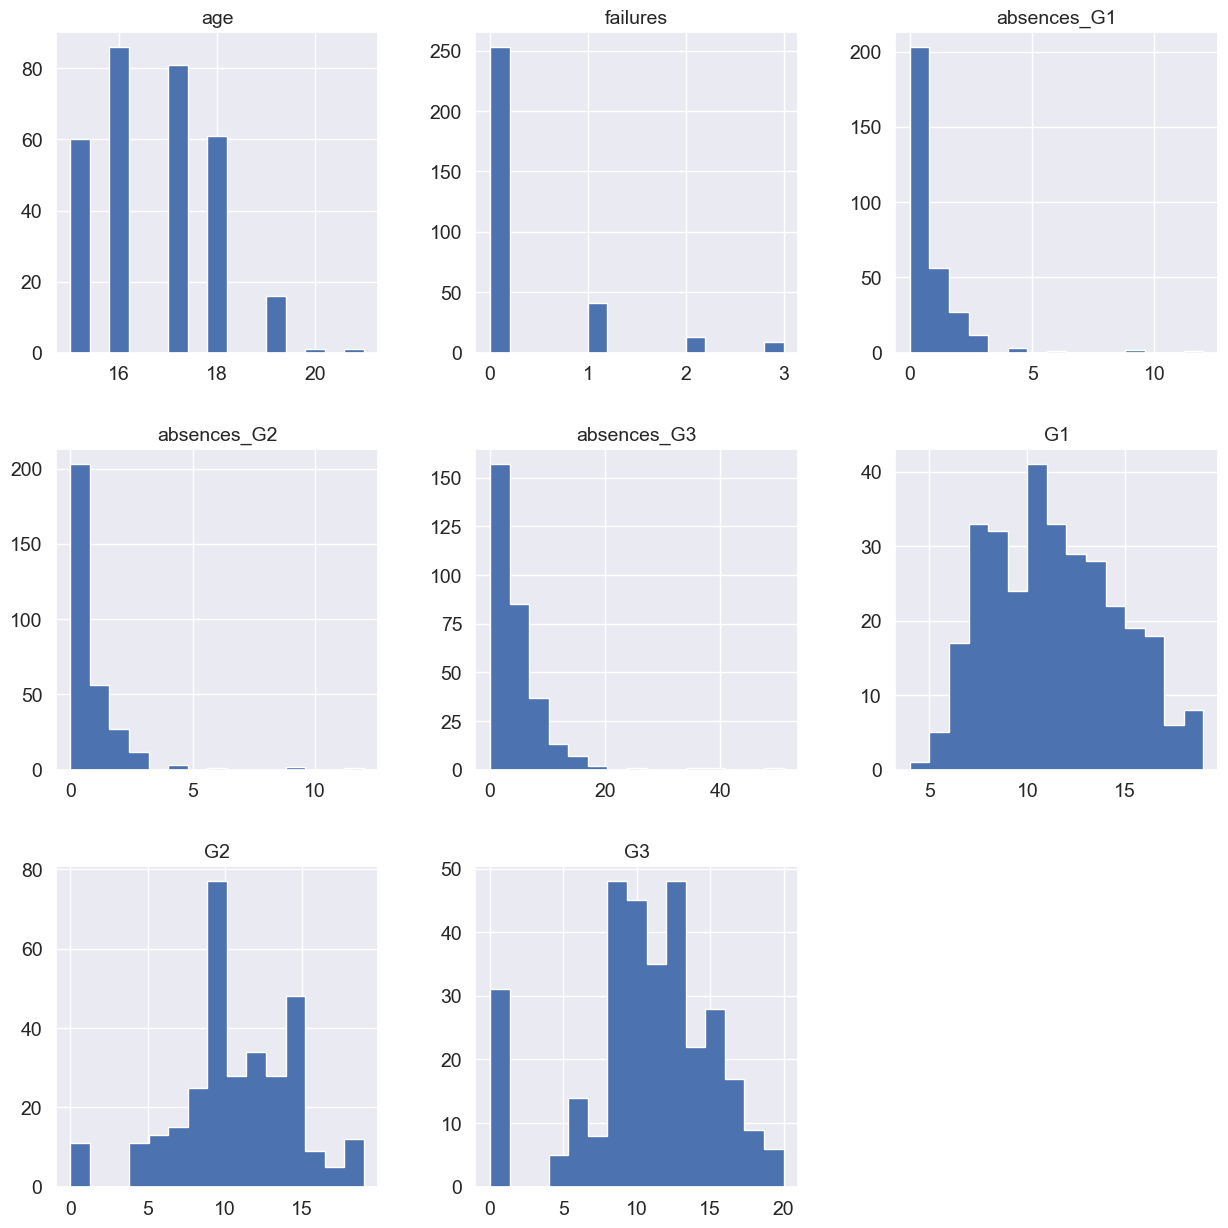

In [15]:
# view the data distribution to see scales of the data and if there are outliers. The skewnees of the data is revealed
sns.set_theme()

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)

train_set.hist(bins = 15, histtype = 'stepfilled', figsize = (15, 15))
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Observations - histograms</p>

* More than 30 students had zero in their final Grade, G3
* A high proportion of students has final grade, G3 ranges between 8 and 13
* Less than 40 students had 15 and above in their final grade, G3
* Some features (e.g absences_G1, absences_G2, and absences_G3) are skewed to the right
* There some outliers in some features - absences_G1, absences_G2, absences_G3, G2, and G3
* Also, it's observed that the features have different scales, which rquires feature scaling for the machine learning purposes

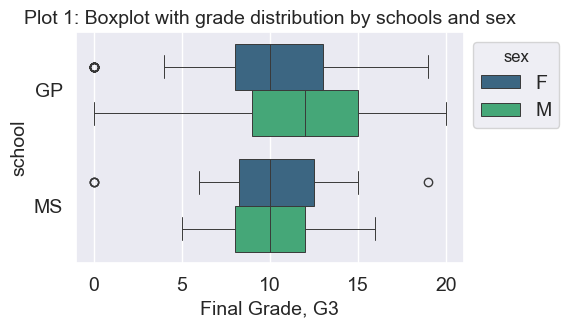

In [16]:
# Final score distributions by school and sex using boxplot 
plt.figure(figsize = (5, 3))
ax1 = sns.boxplot(data = train_set, y = 'school', x = 'G3', palette = 'viridis', orient = 'h', hue = 'sex', linewidth=.7)
sns.move_legend(ax1, 'upper left', bbox_to_anchor =(1, 1))
plt.xlabel('Final Grade, G3')
plt.title('Plot 1: Boxplot with grade distribution by schools and sex')
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Observations - Boxplots</p>

* The boxplots show that there are outliers in final Grade G3 in both schools (GP and MS) and female students
* The outliers high and low outliers need to be investigate - most such students may require extral supports
* Boxplots for both sex in school - Mousinho da Silveira, MS for both male and fenale students and female students in school - Gabriel Pereira, GP  has an approximate same median grade of 10
* The male students in school - Gabriel Pereira has the highest median final grade, G3 of approximately 12
* The boxplot also reveal that male students in school - Gabriel Pereira, GP has the highest final grade, G3 of 20

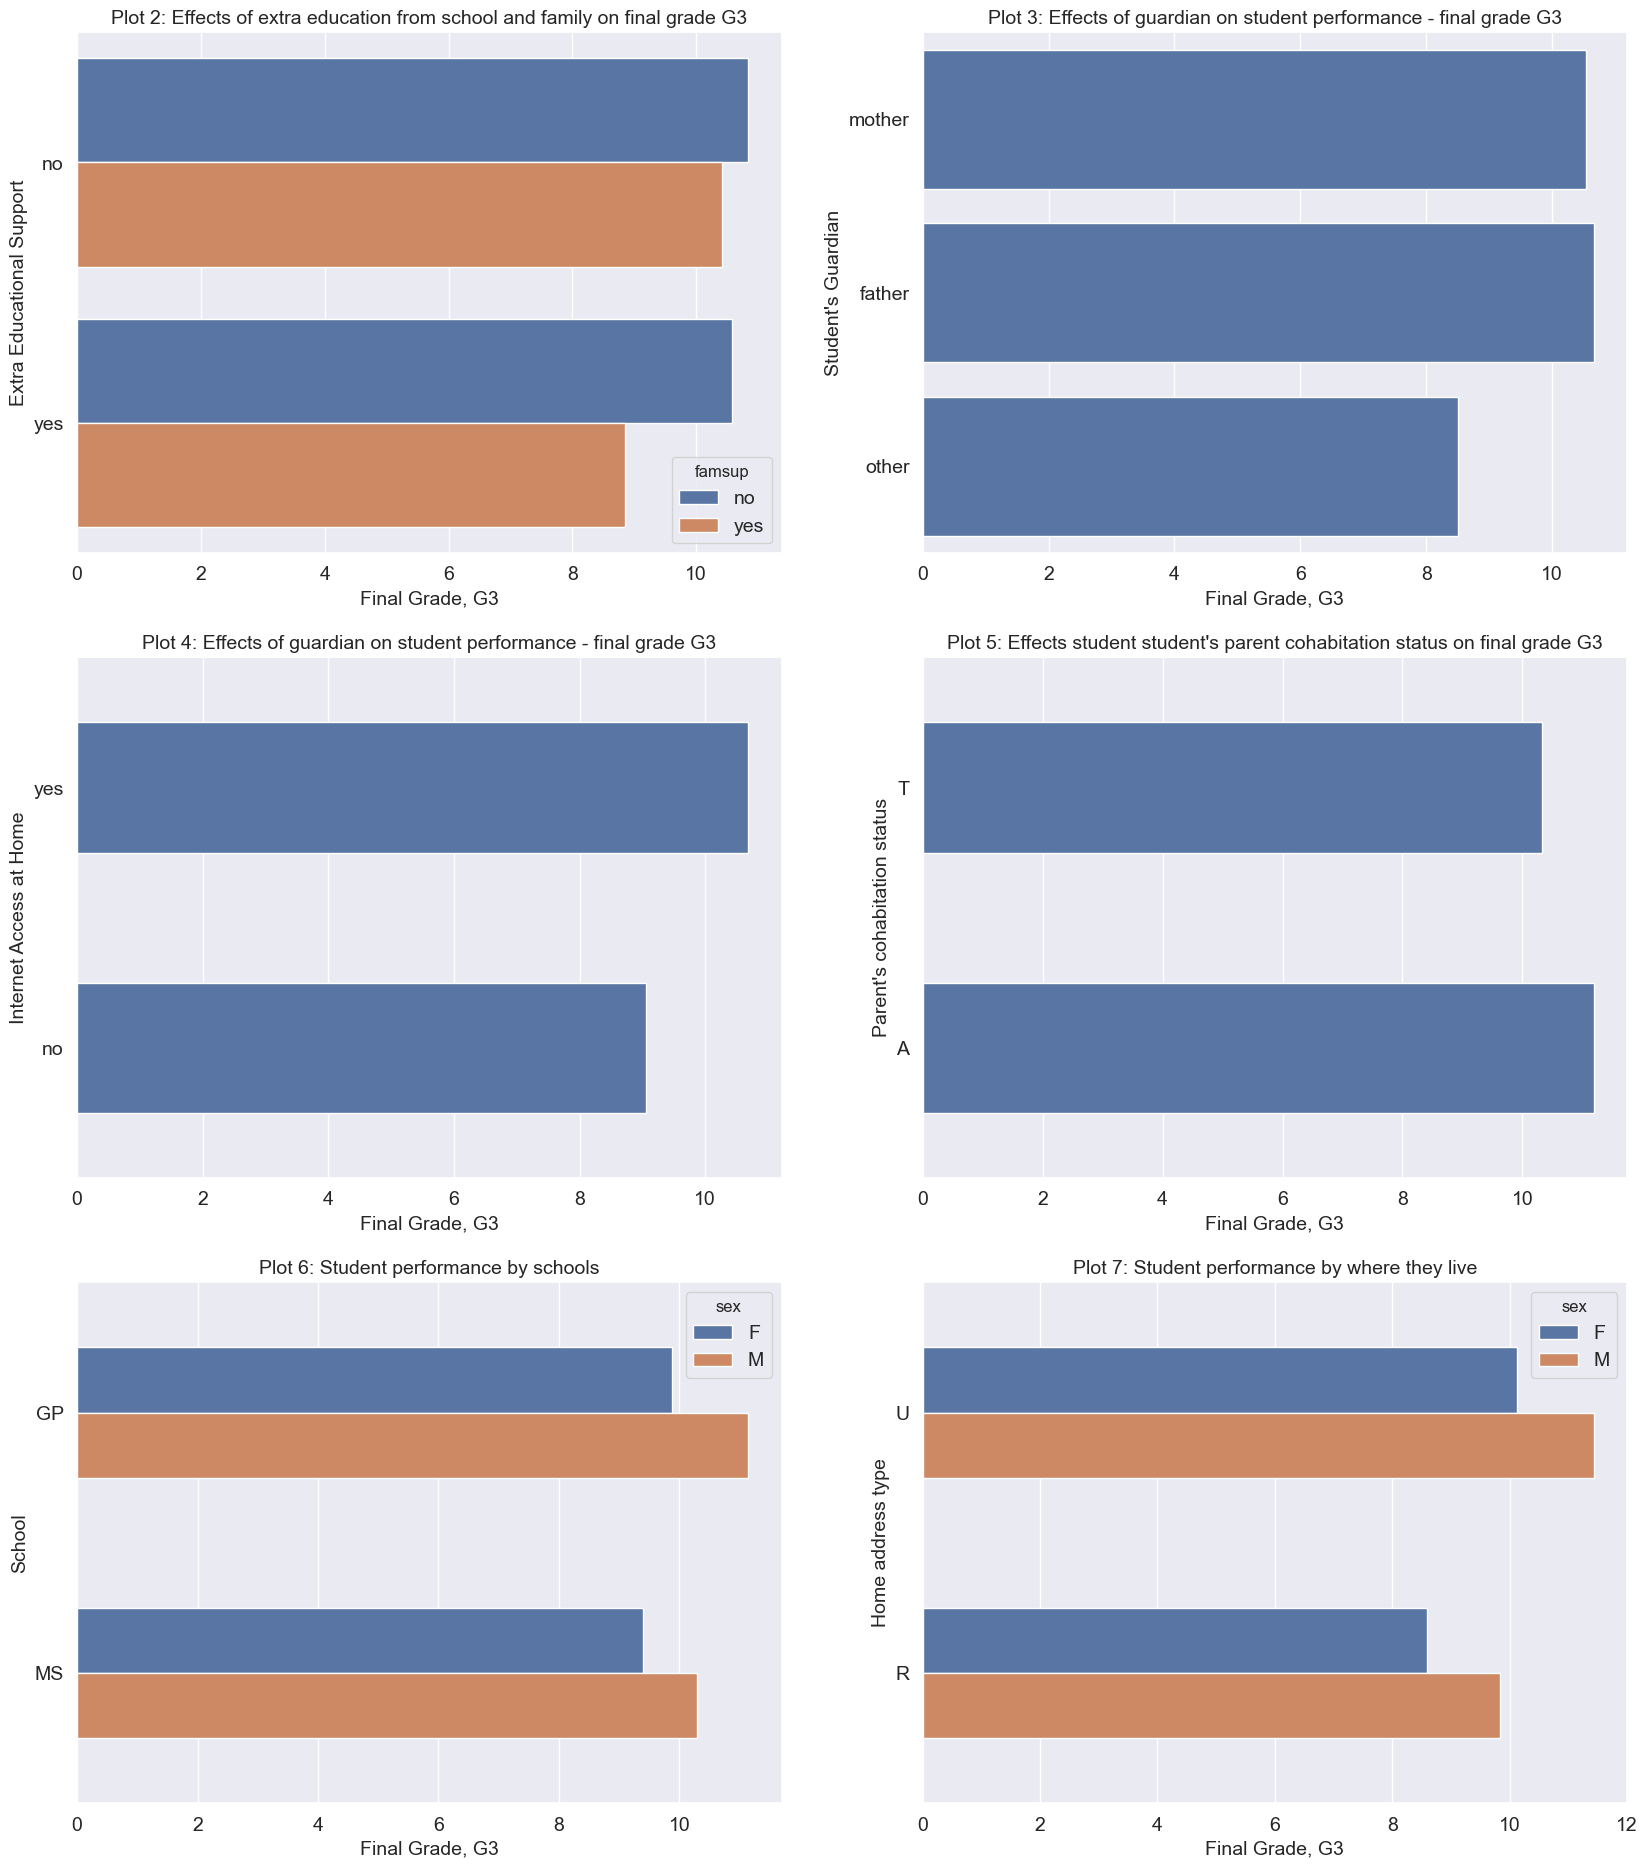

In [17]:
# check the effects of extra education from school and family on final grade G3
sns.set_theme()

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.figure(figsize = (20, 23))

# Plot 6: Effects of extra education from school and family on final grade G3
plt.subplot(3, 2, 1)
sns.barplot(data = train_set, y = 'schoolsup', x = 'G3', errorbar = None, orient = 'h', hue = 'famsup')
#sns.move_legend(ax1, 'lower right')
plt.title('Plot 2: Effects of extra education from school and family on final grade G3')
plt.xlabel('Final Grade, G3')
plt.ylabel('Extra Educational Support')

# Plot 7: Effects of guardian on student performance as evident from final grade G3
plt.subplot(3, 2, 2)
sns.barplot(data = train_set, y = 'guardian', x = 'G3', errorbar = None, orient = 'h') # , hue = 'famsup'
#sns.move_legend(ax1, 'lower right')
plt.title('Plot 3: Effects of guardian on student performance - final grade G3')
plt.xlabel("Final Grade, G3")  
plt.ylabel("Student's Guardian")

# Plot 8: Effects student access to internet on final grade G3
plt.subplot(3, 2, 3)
sns.barplot(data = train_set, y = 'internet', x = 'G3', width = 0.5, errorbar = None, orient = 'h') # , hue = 'famsup'
#sns.move_legend(ax1, 'lower right')
plt.title('Plot 4: Effects of guardian on student performance - final grade G3')
plt.xlabel('Final Grade, G3')
plt.ylabel('Internet Access at Home')

# Plot 9: Effects student student's parent cohabitation status on final grade G3
plt.subplot(3, 2, 4)
sns.barplot(data = train_set, y = 'Pstatus', x = 'G3', width = 0.5, errorbar = None, orient = 'h') # hue = 'famsup'
#sns.move_legend(ax1, 'lower right')
plt.title("Plot 5: Effects student student's parent cohabitation status on final grade G3")
plt.xlabel("Final Grade, G3")
plt.ylabel("Parent's cohabitation status")

# Plot 10: Student performance by schools
plt.subplot(3, 2, 5)
sns.barplot(data = train_set, y = 'school', x = 'G3', width = 0.5, errorbar = None, orient = 'h', hue = 'sex') # hue = 'famsup'
#sns.move_legend(ax1, 'lower right')
plt.title("Plot 6: Student performance by schools")
plt.xlabel("Final Grade, G3")
plt.ylabel('School')

# Plot 11: Effects student student's parent cohabitation status on final grade G3
plt.subplot(3, 2, 6)
sns.barplot(data = train_set, y = 'address', x = 'G3', width = 0.5, errorbar = None, orient = 'h', hue = 'sex') 
#sns.move_legend(ax1, 'lower right')
plt.title("Plot 7: Student performance by where they live")
plt.xlabel("Final Grade, G3")
plt.ylabel('Home address type')

plt.show()

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Observations - Bar graphs</p>

The bar graphs show the relatioship between some predicting categoric features and final grade, G3.
* Plot 2 shows that students without extra educational and family supports performed better than students that received both supports.
* Plot 3 clearly reveals that students living with their fathers and mothers performed better than students do not live/stay with their father or mother.
* Plot 4 shows that students who have access to internet performed better than those that don't have access to internet.
* PLot 5 reveals that students' whose parent don't live together performed better in their final grade, G3 than those whose parents live together.
* It is obivous from plot 6 that male students had higher final grades compared to female students in both schools - Gabriel Pereira (GP) and Mousinho da Silveira (MS).
* In plot 7, students who resides in urban centers (home address is urban) had better final grade compared to those that reside in rural centers (home address is rural)
* Also, plot 7 reveals that male students residing in urban centers had better final grade than female student living in either urban or rural 


<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Correlations between attributes</p>

In [18]:
# Correlations between the train set variables/features
# select the numeric features names
num_column_names = [col for col in train_set.columns if train_set[col].dtype != 'object']
num_features = train_set[num_column_names]
# num_features_df = train_set.select_dtypes(include = [np.number])
corr_matrix = num_features.corr()
# checking the correlation of other features with the target feature
corr_input_output_compared = corr_matrix['G3'].sort_values(ascending = False)

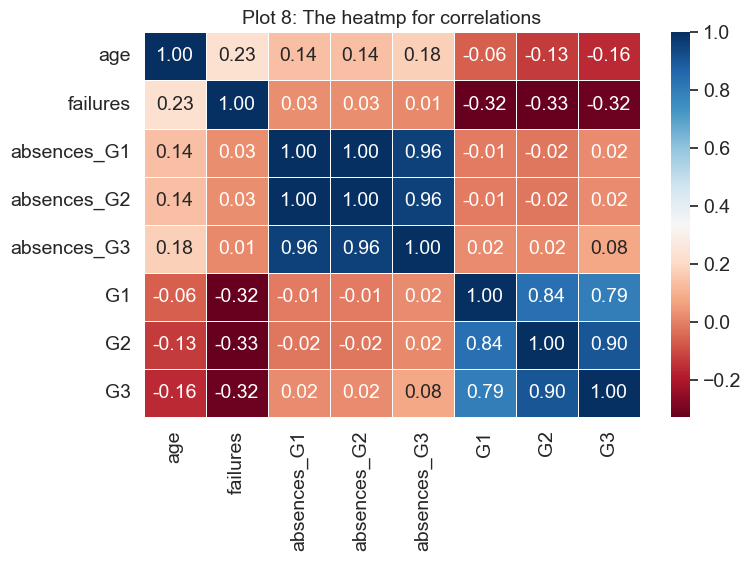

In [19]:
# heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(data = corr_matrix, annot=True, fmt=".2f", cmap = 'RdBu', linewidth=.5)
plt.title('Plot 8: The heatmp for correlations')
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Observations - Heatmap</p>

Heatmap shows the correlations among the different numeric features for the student info data 
* The heatmap reveals that the second term grade, G2 (due to high correlation value of 0.9) is the number one predictor of final grade G3 while first term grade, G1 (correlation value of 0.79) is second predictor of final grade.
* There's a very strong positive correlation (0.90) between the second term grade and final grade
* Also, there's a very strong positive correlation (0.79) between the first term grade and final grade
* The numbers of last class failures has moderately negative correlations (-0.32, -0.33, -0.32) on final grade, second term grade and first term grade.
* There's very strong high  positive correlation between the number of school absences for G1, G2 and G3 terms. 

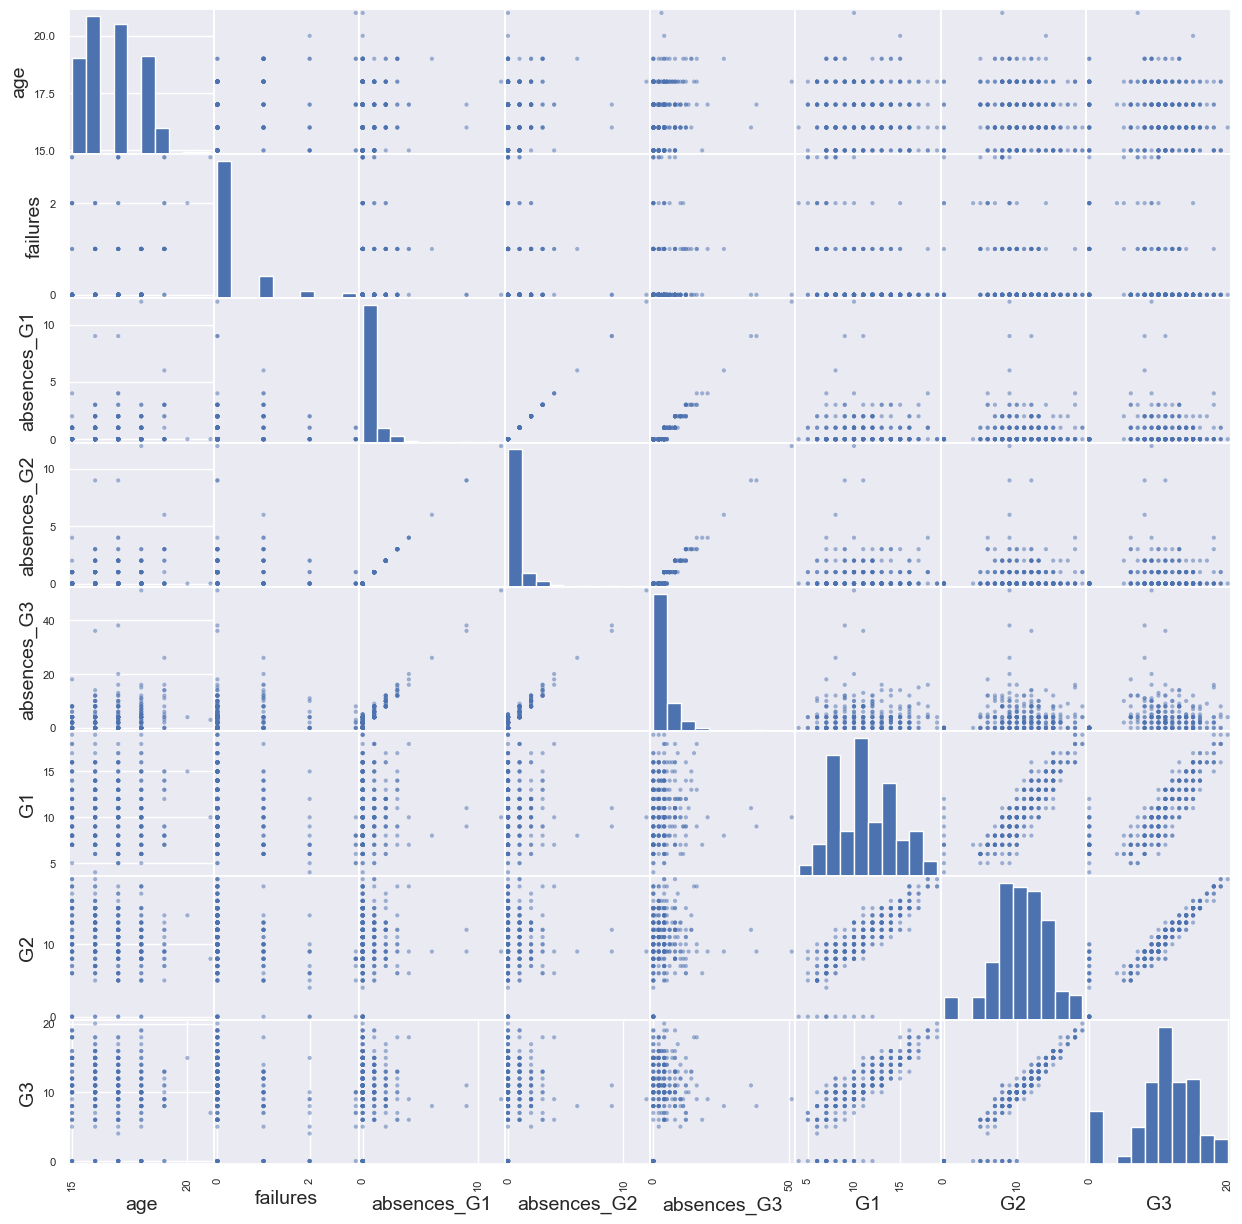

In [20]:
# correlation between attributes with scatter matrix
scatter_matrix(num_features, diagonal='hist', figsize=(15, 15))
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Observations - Heatmap</p>

* The scatter matrix also, reveal that the most promising features in predicting the final grade, G3 are first and second term grades
* Also, this scatter matrix also confirmed that there is very strong high positive correlations between the number of school absences for G1, G2 and G3 terms,

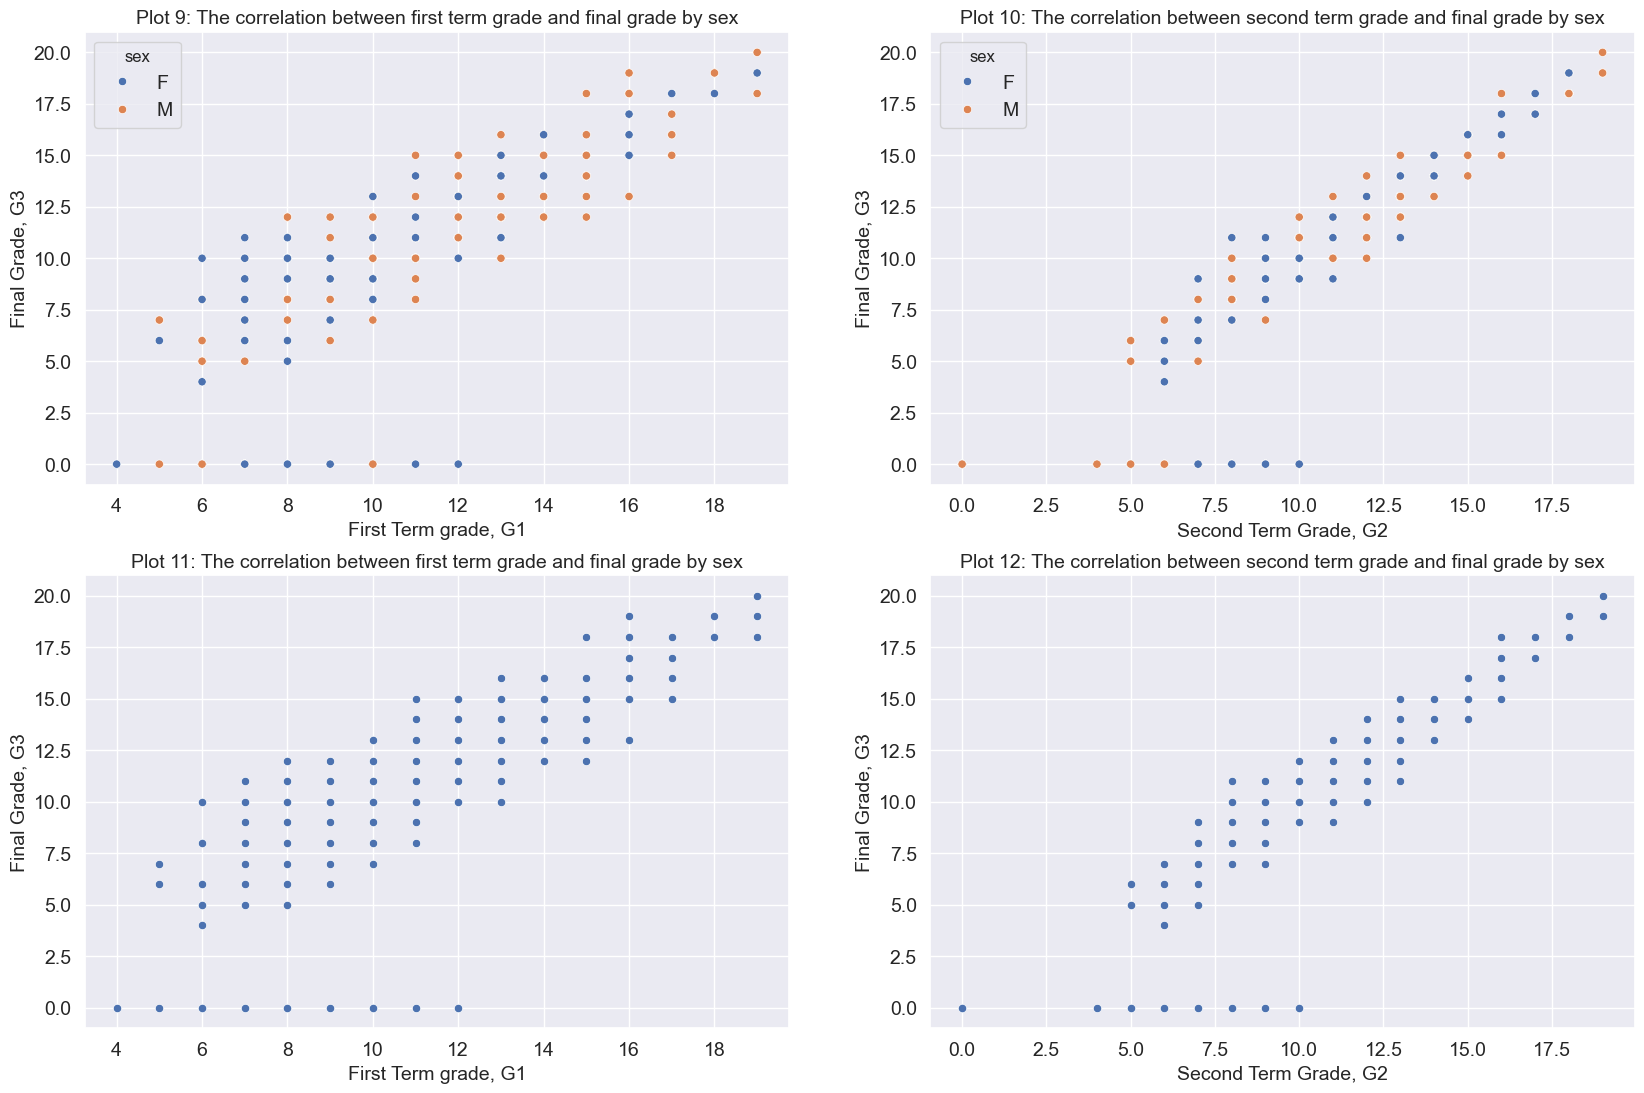

In [21]:
# Students performances by term and sex
sns.set_theme()

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.figure(figsize = (20, 20))

# Plot 1: The correlation between first term grade and final grade by sex
plt.subplot(3, 2, 1)
sns.scatterplot(data = train_set, y = 'G3', x = 'G1', hue = 'sex')
plt.title('Plot 9: The correlation between first term grade and final grade by sex')
plt.xlabel('First Term grade, G1')
plt.ylabel('Final Grade, G3')

# Plot 2: The correlation between second term grade and final grade by sex
plt.subplot(3, 2, 2)
sns.scatterplot(data = train_set, y = 'G3', x = 'G2', hue = 'sex')
plt.title('Plot 10: The correlation between second term grade and final grade by sex')
plt.xlabel('Second Term Grade, G2')
plt.ylabel('Final Grade, G3')

# Plot 3: The correlation between first term grade and final grade by sex
plt.subplot(3, 2, 3)
sns.scatterplot(data = train_set, y = 'G3', x = 'G1') # , hue = 'sex'
plt.title('Plot 11: The correlation between first term grade and final grade by sex')
plt.xlabel('First Term grade, G1')
plt.ylabel('Final Grade, G3')

# Plot 4: The correlation between second term grade and final grade by sex
plt.subplot(3, 2, 4)
sns.scatterplot(data = train_set, y = 'G3', x = 'G2')  # , hue = 'sex'
plt.title('Plot 12: The correlation between second term grade and final grade by sex')
plt.xlabel('Second Term Grade, G2')
plt.ylabel('Final Grade, G3')


plt.show()

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Observations - scatter plots</p>

These plots show relationship/correlation between the target features, final grade G3 and predicting features the first and second term grade G1 and G2 and sex
* There is strong positive correlation between the first term grade and the final grade, i.e in most cases final grage G3 increases with first and second term grades -plots 9, 10, 11 and 12.
* The plots also reveal that male students has the highest grades - plot 9 and 10

## Prepare Student info Data for Machine Learning - Data Cleaning

In [22]:
# drop the target column from the train_set
X_train = train_set.drop(columns = 'G3')

# select the target column from the train 
y_train = train_set['G3']

In [23]:
# # select numeric features from numeric from X_train
num_col_names = [col for col in X_train.columns if X_train[col].dtype != 'object']
X_train_num_attributes = train_set[num_col_names]

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Function that select features based on values of correlation</p>

The function is created to handle numeric data selection based on their values of correlations. Although a lower values of correlation was chosen because about two predicting features are strong correlated with the final grade, G3

In [24]:
# function to select features based on values of correlations and drop columns with low correlations
def select_features(corr_dat):
    selected_attributes = []
    corr_limit = 0.015 # values can be adjusted in case there many features with high values of correlations
    for index, val in corr_input_output_compared.items():
        if abs(val) < corr_limit:
            selected_features.append(index)
    num_attributes = X_train_num_attributes.drop(columns = selected_attributes, axis = 1)
    return num_attributes

# numeric features after drop low correlataions 
X_train_num_attributes = select_features(corr_input_output_compared)

In [25]:
# categoric attributes without consideration for order
X_train_cat_attributes = df_students[['Mjob', 'Fjob', 'reason', 'guardian']]
# categoric attributes
X_cat_col_names = [col for col in df_students.columns if df_students[col].dtypes == 'object']
X_train_num_cat_attributes = df_students[X_cat_col_names]
# drop the X_train_cat_attributes from X_train_num_cat_attributes
X_train_num_cat_attributes = X_train_num_cat_attributes.drop(columns = ['Mjob', 'Fjob', 'reason', 'guardian'], axis = 1)

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Create a custom transformer - feature engineering</p>

In [26]:
# create customer transformer

# get the column index for these columns - absences_G1, absences_G2, absences_G3, G1, G2 
class AddFeaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_G1_G2=True):
        self.drop_G1_G2 = drop_G1_G2

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # create a new column
        # Assuming absences_G1_idx, absences_G2_idx, absences_G3_idx are valid indices
        X['sum_absences_Gs'] = X['absences_G1'] + X['absences_G2'] + X['absences_G3']
        
        #print("X shape before modification:", X.shape)
                
        if self.drop_G1_G2:
            X = X.drop(columns= ['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2'], axis=1)
            
            #print("without G_G2:", X.shape)
        else:
            X = X.drop(columns = ['absences_G1', 'absences_G2', 'absences_G3'], axis=1)
            #print("with G1_G2:", X.shape)
                   
        #print("X shape after modification:", X.shape)
        
        return X     

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Pipeline transform the numeric data and perform feature scaling of numeric data</p>

A numeric data pipeline is created for the cases where first and second term grades (G1 & G2) were considered and not considered as parts of the predicting features.

In [27]:
# Create numerical attributes pipeline true
num_pipeline_true = make_pipeline(SimpleImputer(strategy = 'median').set_output(transform = 'pandas'),
                            AddFeaturesTransformer(),
                            StandardScaler() #  numeric continous feature scaling
                            )

In [28]:
# Create numerical attributes pipeline false
num_pipeline_false = make_pipeline(SimpleImputer(strategy = 'mean').set_output(transform = 'pandas'), 
                             AddFeaturesTransformer(drop_G1_G2 = False),
                             StandardScaler() #  numeric continous feature scaling
                            )

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Pipeline to transform categorical data</p>

A categorical data pipeline is created for the cases where first and second term grades (G1 & G2) were considered and not considered as parts of the predicting features. The categoric data is separated into two: ones in where order was not matter and case where order is matter and binary features.

In [29]:
# create category feature pipeline - norminal features
cat_pipeline_1 = make_pipeline(
                            SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(drop = 'first')                             
                            )

In [30]:
# create category feature pipeline with ordinal & binary features
cat_pipeline_2 = make_pipeline(
                        SimpleImputer(strategy='most_frequent'),
                        OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan) 
                        )

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Column Transformers to transform the numeric and categorical data</p>

In this case a column transform, which combined all the three pipelines created above is created.

In [31]:
# Define pipeline for full pipeline - true: without G1 & G2
#num_attributes = list(X_train_num_features.drop(columns = ['absences_G1', 'absences_G2', 'absences_G3'], axis = 1).columns)
num_attributes = list(X_train_num_attributes.columns)
cat_attributes1 = list(X_train_cat_attributes.columns)
cat_attributes2 = list(X_train_num_cat_attributes.columns)


full_pipeline_withoutG1G2 = ColumnTransformer([
                ('num_attibutes_true', num_pipeline_true, num_attributes),
                ('cat_attibutes1', cat_pipeline_1, cat_attributes1),
                ('cat_attibutes2', cat_pipeline_2, cat_attributes2)
        ])

In [32]:
# Define pipeline for full pipeline - false: with G1 & G2
full_pipeline_withG1G2 = ColumnTransformer([
                ('num_attibutes_false', num_pipeline_false, num_attributes),
                ('cat_attibutes1', cat_pipeline_1, cat_attributes1),
                ('cat_attibutes2', cat_pipeline_2, cat_attributes2),
        ])

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Output the shape of your two transformed training sets: without G1 & G2</p>

In this case the first term and second term grades were dropped from the predicting features thus not considered for the training. This resulted in 39 predicting features

In [33]:
X_train_prepared_true = full_pipeline_withoutG1G2.fit_transform(X_train)
X_train_prepared_true.shape

(316, 39)

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Output the shape of your two transformed training sets: with G1 & G2</p>

In this case the first term and second term grades were not dropped from the predicting features thus not considered for the training. This resulted in a total of 41 predicting features.

In [34]:
X_train_prepared_false = full_pipeline_withG1G2.fit_transform(X_train)
X_train_prepared_false.shape

(316, 41)

## Explore Machine Learning Models

Different machine learning models are considered to train the train set data for cases without G1 & G2 as well as with G1 & G2. The different models are evaluated using the root mean sqaured error (rmse) and the best model is chosen based on the least values rmse obtained from the models.

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Linear Regression Model</p>

In [35]:
# consider basic linear regression model: withoutG1G2
lin_reg_withoutG1G2 = make_pipeline(full_pipeline_withoutG1G2, LinearRegression())
lin_reg_withoutG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_true',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('linearregression', LinearRegression())])

In [36]:
# make predictions with the linear regression model: withoutG1G2
y_predict_linreg_withoutG1G2 = lin_reg_withoutG1G2.predict(X_train)

# performance evaluation of the linear regression model- RMSE
lin_rmse_withoutG1G2 = mean_squared_error(y_train, y_predict_linreg_withoutG1G2, squared = False)
lin_rmse_withoutG1G2

np.float64(3.9060386535573746)

* **Note**: Without G1 & G2 - An approximate (prediction error) RMSE value of 3.91 obtained from linear regression model is not bad since the student final grades range between 0 to 20.

In [37]:
# consider basic linear regression model: with G1G2
lin_reg_withG1G2 = make_pipeline(full_pipeline_withG1G2, LinearRegression())
lin_reg_withG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_false',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer(drop_G1_G2=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('linearregression', LinearRegression())])

In [38]:
# make predictions with the linear regression model: withG1G2
y_predict_linreg_withG1G2 = lin_reg_withG1G2.predict(X_train)

# performance evaluation of the linear regression model withG1G2- RMSE
lin_rmse_withG1G2 = mean_squared_error(y_train, y_predict_linreg_withG1G2, squared = False)
lin_rmse_withG1G2

np.float64(1.805988398335701)

* **Not**: With G1 & G2 - An approximate (prediction error) RMSE value of 1.81 obtained from linear regression model is good one, which gave better predictions over cases without G1 & G2.

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Decision Tree Regression Model</p>

In [39]:
# consider the decision tree regression model: withoutG1G2
tree_reg_withoutG1G2 = make_pipeline(full_pipeline_withoutG1G2, DecisionTreeRegressor(random_state = 42))
tree_reg_withoutG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_true',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [40]:
# make predictions with the decision tree regression model- withoutG1G2
y_predict_treereg_withoutG1G2 = tree_reg_withoutG1G2.predict(X_train)

# performance evaluation of the linear regression model withoutG1G2- RMSE
tree_reg_rmse_withoutG1G2 = mean_squared_error(y_train, y_predict_treereg_withoutG1G2, squared = False)
tree_reg_rmse_withoutG1G2

np.float64(0.0)

* **Note**: Without G1 & G2 - An approximate (prediction error) RMSE value of 0.0 obtained from decision tree regression model is a good one. This shows a good performance over the basic linear regression model but the model may be overfitting the train data.

In [41]:
# consider the decision tree regression model: withG1G2
tree_reg_withG1G2 = make_pipeline(full_pipeline_withG1G2, DecisionTreeRegressor(random_state = 42))
tree_reg_withG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_false',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer(drop_G1_G2=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [42]:
# make predictions with the decision tree regression model - withG1G2
y_predict_treereg_withG1G2 = tree_reg_withG1G2.predict(X_train)

# performance evaluation of the linear regression model withG1G2 - RMSE
tree_reg_rmse_withG1G2 = mean_squared_error(y_train, y_predict_treereg_withG1G2, squared = False)
tree_reg_rmse_withG1G2

np.float64(0.0)

* **Note**: With G1 & G2 -  similar results were obtained as the one without G1 & G2 above for decistion tree   regression model.

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Random Forest Regression Model</p>

In [43]:
# consider Random forest regression model: withoutG1G2
forest_reg_withoutG1G2 = make_pipeline(full_pipeline_withoutG1G2, RandomForestRegressor(random_state = 42))
forest_reg_withoutG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_true',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [44]:
# make predictions with the Random forest regression model withoutG1G2
y_predict_forest_withoutG1G2 = forest_reg_withoutG1G2.predict(X_train)

# performance evaluation of the random forest regression model withoutG1G2- RMSE
forest_reg_rmse_withoutG1G2 = mean_squared_error(y_train, y_predict_forest_withoutG1G2, squared = False)
forest_reg_rmse_withoutG1G2

np.float64(1.5257830527472225)

* **Note:** An approximate (prediction error) RMSE value of 1.49 obtained from random forest regression model is a good one, since the student final grades range between 0 to 20. This shows a good performance over the basic linear regression model.

In [45]:
# consider Random forest regression model: withG1G2
forest_reg_withG1G2 = make_pipeline(full_pipeline_withG1G2, RandomForestRegressor(random_state = 42))
forest_reg_withG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_false',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer(drop_G1_G2=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [46]:
# make predictions with the Random forest regression model: with G1G2
y_predict_forest_withG1G2 = forest_reg_withG1G2.predict(X_train)

# performance evaluation of the random forest regression model with G1G2 - RMSE
forest_reg_rmse_withG1G2 = mean_squared_error(y_train, y_predict_forest_withG1G2, squared = False)
forest_reg_rmse_withG1G2

np.float64(0.6445595100728221)

* **Note**: With G1 & G2 - An approximate (prediction error) RMSE value of less than one (0.62) obtained from random forest regression model is a good one, since the student final grades range between 0 to 20. This shows a good performance over the basic linear regression model. Nonetheless, one can not rule out the model being overfitting the train data.

<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Support Vector Machine Model</p>

In [47]:
# consider support vector machines model -linear: withoutG1G2
svr_lin_withoutG1G2 = make_pipeline(full_pipeline_withoutG1G2, LinearSVR(epsilon = 3.1, random_state = 42))
svr_lin_withoutG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_true',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('linearsvr', LinearSVR(epsilon=3.1, random_state=42))])

In [48]:
# make predictions with the support vector machine model - linear: withoutG1G2
y_predict_svr_lin_withoutG1G2 = svr_lin_withoutG1G2.predict(X_train)

# performance evaluation of the support vector machine model withoutG1G2 - RMSE
svr_reg_rmse_withoutG1G2 = mean_squared_error(y_train, y_predict_svr_lin_withoutG1G2, squared = False)
svr_reg_rmse_withoutG1G2

np.float64(4.019166638367714)

* **Note**: An approximate (prediction error) RMSE value of 4.02 obtained from support vector machine model (linear) is not that great considering the fact the the final grades rang between 0 and 20. This shows that its performance is not as good as the basic linear regression model but fairly close.

In [49]:
# consider support vector machines model -linear: withG1G2
svr_lin_withG1G2 = make_pipeline(full_pipeline_withG1G2, LinearSVR(epsilon = 3.1, random_state = 42))
svr_lin_withG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_false',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer(drop_G1_G2=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('linearsvr', LinearSVR(epsilon=3.1, random_state=42))])

In [50]:
# make predictions with the support vector machine model - linear: withG1G2
y_predict_svr_lin_withG1G2 = svr_lin_withG1G2.predict(X_train)

# performance evaluation of the support vector machine model withG1G2- RMSE
svr_reg_rmse_withG1G2 = mean_squared_error(y_train, y_predict_svr_lin_withG1G2, squared = False)
svr_reg_rmse_withG1G2

np.float64(2.2061939805266566)

* **Note**: With G1 & G2 - An approximate (prediction error) RMSE value of 2.21 obtained from support vector machine model (linear) gave a good predictions over the case without G1 and G2.

In [51]:
# consider support vector machine - poly: withoutG1G2
svr_poly_withoutG1G2 = make_pipeline(full_pipeline_withoutG1G2, SVR(kernel = 'poly', degree = 2, C = 250, epsilon = 0.1))
svr_poly_withoutG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_true',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('svr', SVR(C=250, degree=2, kernel='poly'))])

In [52]:
# make predictions with the support vector machine model - poly: withoutG1G2
y_predict_svr_poly_withoutG1G2 = svr_poly_withoutG1G2.predict(X_train)

# performance evaluation of the support vector machine model withoutG1G2 - ploy- RMSE
svr_poly_rmse_withoutG1G2 = mean_squared_error(y_train, y_predict_svr_poly_withoutG1G2, squared = False)
svr_poly_rmse_withoutG1G2

np.float64(1.3841853051534068)

* **Note**: Without G1 & G2 - An approximate (prediction error) RMSE value of 1.38 obtained from support vector machine model (poly) is good with an improvement over the support vector machine linear.

In [53]:
# consider support vector machine - poly: withG1G2
svr_poly_withG1G2 = make_pipeline(full_pipeline_withG1G2, SVR(kernel = 'poly', degree = 2, C = 250, epsilon = 0.1))
svr_poly_withG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_false',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer(drop_G1_G2=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('svr', SVR(C=250, degree=2, kernel='poly'))])

In [54]:
# make predictions with the support vector machine model - poly: withG1G2
y_predict_svr_poly_withG1G2 = svr_poly_withG1G2.predict(X_train)

# performance evaluation of the support vector machine model withG1G2- ploy- RMSE
svr_poly_rmse_withG1G2 = mean_squared_error(y_train, y_predict_svr_poly_withG1G2, squared = False)
svr_poly_rmse_withG1G2

np.float64(0.3398789775746919)

* **Note*: With G1 & G2 - An approximate (prediction error) RMSE value of less than one (0.34) obtained from support vector machine model (poly) is a good improvement over the support vect machine linear for without G1 & G2.

In [55]:
# consider  Stochastic gradient descent model - withoutG1G2
sdg_reg_withoutG1G2 = make_pipeline(full_pipeline_withoutG1G2, SGDRegressor(random_state = 42))
sdg_reg_withoutG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_true',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('sgdregressor', SGDRegressor(random_state=42))])

In [56]:
# make predictions with the Stochastic gradient descent model: withoutG!G2
y_predict_sdg_reg_withoutG1G2 = sdg_reg_withoutG1G2.predict(X_train)

# performance evaluation of the support vector machine model withoutG1G2 - RMSE
sdg_reg_rmse_withoutG1G2 = mean_squared_error(y_train, y_predict_sdg_reg_withoutG1G2, squared = False)
sdg_reg_rmse_withoutG1G2

np.float64(3.985595454731809)

* **Note**: Without G1 & G2 - An approximate (prediction error) RMSE value of 4.15 obtained from  Stochastic gradient descent model is not that great considering the fact the the final grades rang between 0 and 20

In [57]:
# consider  Stochastic gradient descent model - withG1G2
sdg_reg_withG1G2 = make_pipeline(full_pipeline_withG1G2, SGDRegressor(random_state = 42))
sdg_reg_withG1G2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_attibutes_false',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('addfeaturestransformer',
                                                                   AddFeaturesTransformer(drop_G1_G2=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'failures',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat_attibutes1',
                                                  Pipeline(ste...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'traveltime',
                                                   'studytime', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health'])])),
                ('sgdregressor', SGDRegressor(random_state=42))])

In [58]:
# make predictions with the Stochastic gradient descent model: with G1G2
y_predict_sdg_reg_withG1G2 = sdg_reg_withG1G2.predict(X_train)

# performance evaluation of the support vector machine model withG1G2 - RMSE
sdg_reg_rmse_withG1G2 = mean_squared_error(y_train, y_predict_sdg_reg_withG1G2, squared = False)
sdg_reg_rmse_withG1G2

np.float64(1.9526289421835843)

* **Note**: With G1 & G2 - An approximate (prediction error) RMSE value of 1.95 obtained from Stochastic gradient descent model is relatively good values considering the fact the the final grades rang between 0 and 20. Moreso, the predictions in this case of with G1 and G2 values is better than the one without G1 and G2.

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Compare the models with and without G1 & G2 with Cross-Validation</p>

In order to have a better evaulation of the models fitted above, a cross validation function was used on them. But it's worthy of note that the following models (linear regression, Stochastic gradient descent - linear & poly, and support vector machine model) cannot handle missing values encoded as NaN natively with the implementation of cross validation function. Thus, all returned nan when cross validation function was implemented on them. Meanwhile, the decision tree regression and random forest regression models were able to handle missing values encoded as NaN when cross validation function was implemented.   

In [59]:
# cross validation for decision tree regression model: withoutG1G2
tree_rmses_withoutG1G2 = -cross_val_score(tree_reg_withoutG1G2, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
avg_tree_rmses_withoutG1G2 = tree_rmses_withoutG1G2.mean()
avg_tree_rmses_withoutG1G2

np.float64(5.564826871345358)

In [60]:
# cross validation for decision tree regression model: withG1G2
tree_rmses_withG1G2 = -cross_val_score(tree_reg_withG1G2, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
avg_tree_rmses_withG1G2 = tree_rmses_withG1G2.mean()
avg_tree_rmses_withG1G2

np.float64(2.1098475094368934)

In [61]:
# cross validation for random forest regression model: withoutG1G2
forest_rmses_withoutG1G2 = -cross_val_score(forest_reg_withoutG1G2, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
avg_forest_rmses_withoutG1G2 = forest_rmses_withoutG1G2.mean()
avg_forest_rmses_withoutG1G2

np.float64(3.919199141263544)

In [62]:
# cross validation for random forest regression model: withG1G2
forest_rmses_withG1G2 = -cross_val_score(forest_reg_withG1G2, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
avg_forest_rmses_withG1G2 = forest_rmses_withG1G2.mean()
avg_forest_rmses_withG1G2

np.float64(1.7097021042552947)

In [63]:
# cross validation for linear regression model: withoutG1G2
lin_reg_rmses_withoutG1G2 = -cross_val_score(lin_reg_withoutG1G2, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
avg_lin_reg_rmses_withoutG1G2 = lin_reg_rmses_withoutG1G2.mean()
avg_lin_reg_rmses_withoutG1G2

np.float64(nan)

In [64]:
# cross validation for linear regression model: withG1G2
lin_reg_rmses_withG1G2 = -cross_val_score(lin_reg_withG1G2, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
avg_lin_reg_rmses_withG1G2 = lin_reg_rmses_withG1G2.mean()
avg_lin_reg_rmses_withG1G2

np.float64(nan)

In [65]:
# put the mean of the RMSEs obtained from cross val for three of the models - "Decision Tree", "Random Forest", "Linear Regression"
data = {"Ave_RMSEs_without_G1_G2": [5.564826871345358, 3.919199141263544, np.nan], "Ave_RMSEs_with_G1_G2" : [2.1098475094368934, 1.7097021042552947, np.nan]}
df = pd.DataFrame(data)
df.index = ["Decision Tree", "Random Forest", "Linear Regression"]
df

,Ave_RMSEs_without_G1_G2,Ave_RMSEs_with_G1_G2
Decision Tree,5.564827,2.109848
Random Forest,3.919199,1.709702
Linear Regression,NaN,NaN


<p ### style="font-family: Arial; font-size:1.4em;color:green;" >Observations</p>

* The **Random Forest Regression** model gave the best predictions due to its lower values (1.709702 for model with G1 and G2 grades) of the RMSEs obtained from cross validation function and will be chosen for further use in grid search to fine-tune its hyperparameters.

## Fine-Tune the System

The chosen machine learning model for fine-tuning is **Random Forest Regression with first (G1) term and second (G2) term grades**. The different combinations of parameters were tested and some of their results presented in table below. The observations were present below.

In [66]:
# define the parameter grid
parameter_grid1 = [
 {'n_estimators': [5, 15, 40], 'max_features': [4, 6, 10, 12]},
 {'bootstrap': [False], 'n_estimators': [3, 15], 'max_features': [2, 6, 10]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search1 = GridSearchCV(forest_reg, parameter_grid1, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search1.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [4, 6, 10, 12],
                          'n_estimators': [5, 15, 40]},
                         {'bootstrap': [False], 'max_features': [2, 6, 10],
                          'n_estimators': [3, 15]}],
             scoring='neg_mean_squared_error')

In [67]:
# search the best combination of parameters
grid_search1.best_params_

{'max_features': 12, 'n_estimators': 40}

In [68]:
# obtain the best estimator
grid_search1.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=40, random_state=42)

In [69]:
# define the parameter grid
parameter_grid2 = [
 {'n_estimators': [15, 20, 50], 'max_features': [6, 8, 12, 16]},
 {'bootstrap': [False], 'n_estimators': [15, 30], 'max_features': [10, 15, 30]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)
# set up the grid search
grid_search2 = GridSearchCV(forest_reg, parameter_grid2, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search2.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [6, 8, 12, 16],
                          'n_estimators': [15, 20, 50]},
                         {'bootstrap': [False], 'max_features': [10, 15, 30],
                          'n_estimators': [15, 30]}],
             scoring='neg_mean_squared_error')

In [70]:
# search the best combination of parameters
grid_search2.best_params_

{'bootstrap': False, 'max_features': 15, 'n_estimators': 30}

In [71]:
# obtain the best estimator
grid_search2.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=15, n_estimators=30,
                      random_state=42)

In [72]:
# define the parameter grid
parameter_grid3 = [
 {'n_estimators': [10, 14, 20], 'max_features': [8, 14, 16, 22]},
 {'bootstrap': [False], 'n_estimators': [16, 24], 'max_features': [14, 16, 20]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search3 = GridSearchCV(forest_reg, parameter_grid3, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search3.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [8, 14, 16, 22],
                          'n_estimators': [10, 14, 20]},
                         {'bootstrap': [False], 'max_features': [14, 16, 20],
                          'n_estimators': [16, 24]}],
             scoring='neg_mean_squared_error')

In [73]:
# search the best combination of parameters
grid_search3.best_params_

{'bootstrap': False, 'max_features': 20, 'n_estimators': 24}

In [74]:
# obtain the best estimator
grid_search3.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=20, n_estimators=24,
                      random_state=42)

In [75]:
# define the parameter grid
parameter_grid4 = [
 {'n_estimators': [8, 12, 16], 'max_features': [12, 14, 16, 20]},
 {'bootstrap': [False], 'n_estimators': [4, 10], 'max_features': [10, 12, 18]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search4 = GridSearchCV(forest_reg, parameter_grid4, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search4.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [12, 14, 16, 20],
                          'n_estimators': [8, 12, 16]},
                         {'bootstrap': [False], 'max_features': [10, 12, 18],
                          'n_estimators': [4, 10]}],
             scoring='neg_mean_squared_error')

In [76]:
# search the best combination of parameters
grid_search4.best_params_

{'max_features': 20, 'n_estimators': 12}

In [77]:
# obtain the best estimator
grid_search4.best_estimator_

RandomForestRegressor(max_features=20, n_estimators=12, random_state=42)

In [78]:
# define the parameter grid
parameter_grid5 = [
 {'n_estimators': [14, 18, 25], 'max_features': [2, 10, 15, 20]},
 {'bootstrap': [False], 'n_estimators': [40, 80], 'max_features': [3, 5, 25]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search5 = GridSearchCV(forest_reg, parameter_grid5, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search5.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 10, 15, 20],
                          'n_estimators': [14, 18, 25]},
                         {'bootstrap': [False], 'max_features': [3, 5, 25],
                          'n_estimators': [40, 80]}],
             scoring='neg_mean_squared_error')

In [79]:
# search the best combination of parameters
grid_search5.best_params_

{'max_features': 20, 'n_estimators': 18}

In [80]:
# obtain the best estimator
grid_search5.best_estimator_

RandomForestRegressor(max_features=20, n_estimators=18, random_state=42)

In [81]:
# define the parameter grid
parameter_grid6 = [
 {'n_estimators': [14, 18, 25], 'max_features': [5, 15, 30, 45]},
 {'bootstrap': [False], 'n_estimators': [12, 20], 'max_features': [25, 35, 55]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search6 = GridSearchCV(forest_reg, parameter_grid6, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search6.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [5, 15, 30, 45],
                          'n_estimators': [14, 18, 25]},
                         {'bootstrap': [False], 'max_features': [25, 35, 55],
                          'n_estimators': [12, 20]}],
             scoring='neg_mean_squared_error')

In [82]:
# search the best combination of parameters
grid_search6.best_params_

{'max_features': 30, 'n_estimators': 25}

In [83]:
# obtain the best estimator
grid_search6.best_estimator_

RandomForestRegressor(max_features=30, n_estimators=25, random_state=42)

In [84]:
# define the parameter grid
parameter_grid7 = [
 {'n_estimators': [10, 15, 20], 'max_features': [10, 15, 45, 40]},
 {'bootstrap': [False], 'n_estimators': [5, 25], 'max_features': [15, 25, 45]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search7 = GridSearchCV(forest_reg, parameter_grid7, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search7.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [10, 15, 45, 40],
                          'n_estimators': [10, 15, 20]},
                         {'bootstrap': [False], 'max_features': [15, 25, 45],
                          'n_estimators': [5, 25]}],
             scoring='neg_mean_squared_error')

In [85]:
# search the best combination of parameters
grid_search7.best_params_

{'max_features': 40, 'n_estimators': 20}

In [86]:
# obtain the best estimator
grid_search7.best_estimator_

RandomForestRegressor(max_features=40, n_estimators=20, random_state=42)

In [87]:
# define the parameter grid
parameter_grid8 = [
 {'n_estimators': [15, 25, 70], 'max_features': [20, 30, 40, 50]},
 {'bootstrap': [False], 'n_estimators': [45, 65], 'max_features': [15, 25, 45]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search8 = GridSearchCV(forest_reg, parameter_grid8, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search8.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [20, 30, 40, 50],
                          'n_estimators': [15, 25, 70]},
                         {'bootstrap': [False], 'max_features': [15, 25, 45],
                          'n_estimators': [45, 65]}],
             scoring='neg_mean_squared_error')

In [88]:
# search the best combination of parameters
grid_search8.best_params_

{'max_features': 20, 'n_estimators': 15}

In [89]:
# obtain the best estimator
grid_search8.best_estimator_

RandomForestRegressor(max_features=20, n_estimators=15, random_state=42)

In [90]:
# define the parameter grid
parameter_grid9 = [
 {'n_estimators': [25, 55, 70], 'max_features': [18, 20, 30, 40]},
 {'bootstrap': [False], 'n_estimators': [35, 65], 'max_features': [10, 20, 40]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search9 = GridSearchCV(forest_reg, parameter_grid9, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search9.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [18, 20, 30, 40],
                          'n_estimators': [25, 55, 70]},
                         {'bootstrap': [False], 'max_features': [10, 20, 40],
                          'n_estimators': [35, 65]}],
             scoring='neg_mean_squared_error')

In [91]:
# search the best combination of parameters
grid_search9.best_params_

{'max_features': 40, 'n_estimators': 25}

In [92]:
# obtain the best estimator
grid_search9.best_estimator_

RandomForestRegressor(max_features=40, n_estimators=25, random_state=42)

In [93]:
# define the parameter grid
parameter_grid10 = [
 {'n_estimators': [35, 45, 60], 'max_features': [12, 18, 24, 20]},
 {'bootstrap': [False], 'n_estimators': [15, 40], 'max_features': [15, 18, 30]},
 ]
forest_reg = RandomForestRegressor(random_state = 42)

# set up the grid search
grid_search10 = GridSearchCV(forest_reg, parameter_grid10, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search10.fit(X_train_prepared_false, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [12, 18, 24, 20],
                          'n_estimators': [35, 45, 60]},
                         {'bootstrap': [False], 'max_features': [15, 18, 30],
                          'n_estimators': [15, 40]}],
             scoring='neg_mean_squared_error')

In [94]:
# search the best combination of parameters
grid_search10.best_params_

{'max_features': 20, 'n_estimators': 35}

In [95]:
# obtain the best estimator
grid_search10.best_estimator_

RandomForestRegressor(max_features=20, n_estimators=35, random_state=42)

In [96]:
# evaluated scores
def scores_eval(grid_search):
    eval_scores = grid_search.cv_results_
    for mean_score, params in zip(eval_scores['mean_test_score'], eval_scores['params']):
        print(np.sqrt(-mean_score), params)

# call scores_eval function to obtain the evalutions scores
scores_eval(grid_search8)

1.7523782026375943 {'max_features': 20, 'n_estimators': 15}
1.7624265829581272 {'max_features': 20, 'n_estimators': 25}
1.829368531755071 {'max_features': 20, 'n_estimators': 70}
1.8302036779127897 {'max_features': 30, 'n_estimators': 15}
1.775993998452608 {'max_features': 30, 'n_estimators': 25}
1.7918118090463353 {'max_features': 30, 'n_estimators': 70}
1.8142709070484093 {'max_features': 40, 'n_estimators': 15}
1.755715021891434 {'max_features': 40, 'n_estimators': 25}
1.7799327950173012 {'max_features': 40, 'n_estimators': 70}
1.8125079821024748 {'max_features': 50, 'n_estimators': 15}
1.7822656127204257 {'max_features': 50, 'n_estimators': 25}
1.7882041598391258 {'max_features': 50, 'n_estimators': 70}
1.9050711150402675 {'bootstrap': False, 'max_features': 15, 'n_estimators': 45}
1.9147334112999301 {'bootstrap': False, 'max_features': 15, 'n_estimators': 65}
1.9643588989270384 {'bootstrap': False, 'max_features': 25, 'n_estimators': 45}
1.9612255849492788 {'bootstrap': False, 'ma

In [97]:
# put the evaluations scores in tablular form
data1 = {"RMSE": [1.9496062986516183, 1.9002455053491503, 1.8985380702108405, 1.7385651306822931, 1.7364242222058126, 1.775993998452608, 
                  1.7452439268157622, 1.7523782026375943, 1.755715021891434, 1.7723369224006753], 
         "boostrap" : [np.nan, False, False, False, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],                                                                   
        "max_features": [12, 15, 20, 20, 20, 30, 40,20, 40, 20], "no_estimators": [40, 30, 24, 12, 18, 25, 20, 15, 25, 35]}
df1 = pd.DataFrame(data1)
df1.index = ["grid_search1", "grid_search2", "grid_search3", "grid_search4", "grid_search5", "grid_search6", "grid_search7", "grid_search8",
            "grid_search9", "grid_search10"]
df1

,RMSE,boostrap,max_features,no_estimators
grid_search1,1.949606,NaN,12,40
grid_search2,1.900246,False,15,30
grid_search3,1.898538,False,20,24
grid_search4,1.738565,False,20,12
grid_search5,1.736424,NaN,20,18
grid_search6,1.775994,NaN,30,25
grid_search7,1.745244,NaN,40,20
grid_search8,1.752378,NaN,20,15
grid_search9,1.755715,NaN,40,25
grid_search10,1.772337,NaN,20,35


In [98]:
# Select row with least RMSE
rmse_min = df1['RMSE'].min()
df1[df1['RMSE'] == rmse_min]

,RMSE,boostrap,max_features,no_estimators
grid_search5,1.736424,NaN,20,18


<p #### style="font-family: Arial; font-size:1.4em;color:green;" >Observations</p>

* In view of the above the parameter combinations that with the least RMSE (1.736424) is {'max_features': 20, 'n_estimators': 18}, which is very close to the value (1.709702) obtained from the default hyperparameter values. Thus, it will be chosen for evaluating the test set.

<p #### style="font-family: Arial; font-size:1.4em;color:blue;" >Transform the test prepared data pipeline</p>

Since, the case that considered G1 & G3 as parts of the predicting features gave the best predictions by Random Forest and the final model selected its best parameters and estimator was used to transform the test set.

In [99]:
# evaluate the best model (based on least value of RMSE) as final model
final_model  = grid_search5.best_estimator_

# drop the target column from the test_set
X_test = test_set.drop(columns = 'G3')

# select the target column from test sets
y_test = test_set['G3']

# transform the pipeline withG1&G2
X_test_prepared_withG1G2 = full_pipeline_withG1G2.transform(X_test)

<p ### style="font-family: Arial; font-size:1.4em;color:blue;" >Selecting final model and measure its performance on the test set

The chosen final model is **Random Forest** with max_feature of 20 and n_estimator of 18 and gave a root mean squared error of 1.736424

In [100]:
# final predictions 
final_predictions = final_model.predict(X_test_prepared_withG1G2)

In [101]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

np.float64(1.3593051827231772)

## Conclusion

> In conclusion, this project aimed to accurately predict students’ performances in a class based on different factors (sex, age, school, address, mother’s and father education etc.) as presented from student data provided. This project will help the advising team of the Portuguese system educational for Gabriel Pereria (GP) and Mousinho da Silveria (MS) schools to timely identify students who are in need of additional educational supports to improve on their final grades. 

> The student information dataset was downloaded UC Irvine Machine Learning Repository. The data contains student performance data from two Portuguese school and data was through reports and questionnaires. The dataset was clean and preprocessed through the following steps/procedures:

> *	Use of Sklearn SimpleImputer class to handle cases of missing values from the student info dataset.
> *	Use of Sklearn StandardScaler function method for standardizing features with a view to remove the mean and scale to unit variance.
> *	Use of OneHotEndcoder to encode categorical features in the student info dataset
> *	Use of OrdinalEncoder to encoder categoric features where order is given priority.
> *	Use of BaseEstimator and TransformerMixin for feature engineering i.e., creating new feature – sum_absences_Gs
> *	Use of cross validation function to make better evaluations of the different models
  
> Through exploratory data analysis (EDA), it was discovered that second term and first term grades (G1 and G2) have very strong positive correlations with the final grade, G3. Thus, made them (G1 and G2) main predictors of final grade, G3. Other insight from EDA is that students access to internet plays a critical role in their performances and the highest median and the highest final grade was obtained from GP school, which was scored by the male students. Outliers were observed from final grade zero final grade, which can be further investigated. Among other insights is that male students performed better than female students in the two schools as well as the two types of addresses (urban and rural) considered for this study. Students in urban areas (both male and female) had higher final grade values compared to their counterparts living in rural areas. 

> In this work, various machine learning algorithms (linear regression, decison trees, random forest, and support vector machines) were considered for the training the train data set and their performances were evaluated using the cross-validation function with the root mean squared error (RMSE) used as performance metric. The machine learning trainings were trained for cases with and without the first and second term grades considered as predicting features and results were compared. The algorithm Random Forest with the least RMSE (1.709702) was chosen for hyperparameter tuning using grid search to determine the best parameters and estimator for the final model selection. It is important to bring to your attention that some models (linear regression, Stochastic gradient descent - linear & poly, and support vector machine model) cannot handle missing values encoded as NaN natively with the implementation of cross validation function. So, they all returned nan when cross validation function was implemented on them.

> The machine learning algorithm, Random Forest gave the best predictions based on the values of the RMSEs (2.109848 for without G1 & G2 and 1.709702 for with G1 & G2) obtained for cases with and without first and second term grades as parts of predicting features. Since, the case with first and second terms grade included as part of predicting features gave the least RMSE (1.709702), thus it was selected and used on the test model. Its performance on the test model was evaluated. The chosen model, Random Forest achieved RMSE value of 1.3593 on the test set, which is considered a good model since we don’t have any baseline model to make comparison with. Thus, its predictions is considered good and can be used by advising team to proactively give appropriate extra supports to students with lower final grade (based on model predictions) in subsequent term or school year/session. Based on the grading system by Portuguese educational system, any predicted values less than 10 is considered a fail. Therefore, any student with final grade, G3 predictions of less than 10 will need extra support or interventions.

> Since the grades in the students’ info data is only for Mathematics and for two schools within the Portuguese educational system, in future this model can be employed for other classes (like sciences and arts) as well as to other schools in the Portuguese educational system.